## Introduction to Scikit-Learn (sklearn)

This demonstrates some of the most useful function of the wonderful Scikit_learn library

what we are to cover:

0. An end-to-end Scikit-learn workflow.
1. Getting the data ready.
2. Choose the right estimater(model)/algorithm for our problem.
3. fit the model(estimator)/algorithm and use it to make predictions on our data.
4. Evaluating a model.
5. Improve a model.
6. Save and load a trained model.
7. putting all together.

---


##

0.  An end-to-end Scikit-learn wrokflow


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. get ready data

there are two ways change data to numerical\
1.1 make all data numerical


In [9]:
df = pd.read_csv('home_value.csv')

In [10]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [12]:
df.index

RangeIndex(start=0, stop=3479, step=1)

In [13]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [14]:
# resure that ther is no NAN cells in DataSet
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

<Axes: >

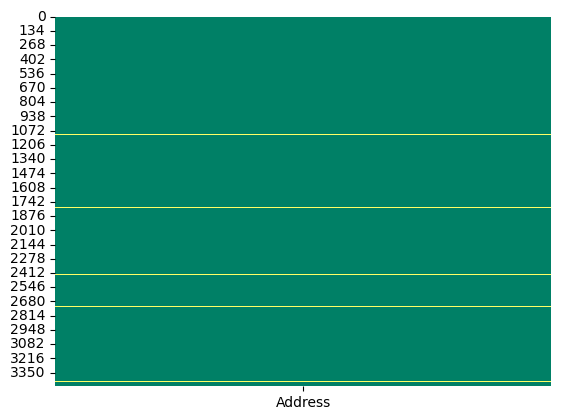

In [15]:
import seaborn as sns 

sns.heatmap(df[['Address']].isna(), cbar=False, cmap='summer')

In [16]:
# fill empty cells
df['Address'] = df['Address'].fillna('missing data', inplace=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3479 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [18]:
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [19]:
# turn object to numeric

df['Area'] = pd.to_numeric(df['Area'],errors='coerce')

In [20]:
#shuffeling index
df = df.sample(frac=1)

In [21]:
x = df.drop(['Price', 'Address', 'Price(USD)'], axis=1)
y = df['Price']

In [22]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# changing categorical features
cat_features = ['Parking', 'Warehouse', 'Elevator']
num_features = ['Room','Area']

# setup functions
one_hot = OneHotEncoder()
scaler = StandardScaler()

# perform transform function
transformer = ColumnTransformer([
    ('one_hot', one_hot, cat_features),
    ('scaler', scaler,num_features )
], remainder='passthrough')

X = transformer.fit_transform(x)

The RMSE is often used to evaluate the performance of regression models because it provides a clear interpretation of the average prediction error in the same units as the target variable.


In [65]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

def metrics_Evaluate(y_true, y_pres):
    """"
    perform evaluation comparison on y_true labels vs. y_pred labels.
    on a regressor
    """
    r2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)  # Calculate RMSE from MSE
    metrics_dict={
        "r2": round(r2, 2),
        "MAE": round(MAE, 2),
        "MSE": round(MSE, 2),
        "RMSE": round(RMSE, 2),
        
    }
    print(f"re: {r2:.2f}")
    print(f"MAE: {MAE:.2f}")
    print(f"MSE: {MSE:.2f}")
    print(f"RMSE: {RMSE:.2f}")

    return(metrics_Evaluate)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

np.random.seed(46)

#setup train_test_spilt
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# perform model and fit
Rfr = RandomForestRegressor(n_estimators=100)
Rfr.fit(x_train,y_train)

# make prediction for model
y_pred = Rfr.predict(x_test)

# model score
print(f"score: {Rfr.score(x_test, y_test)}")
metrics_Evaluate(y_test, y_pred);

score: 0.6326898810645618
re: 0.63
MAE: 2193887515.27
MSE: 20754562777503924224.00
RMSE: 4555717591.94


(20.0, 320.0)

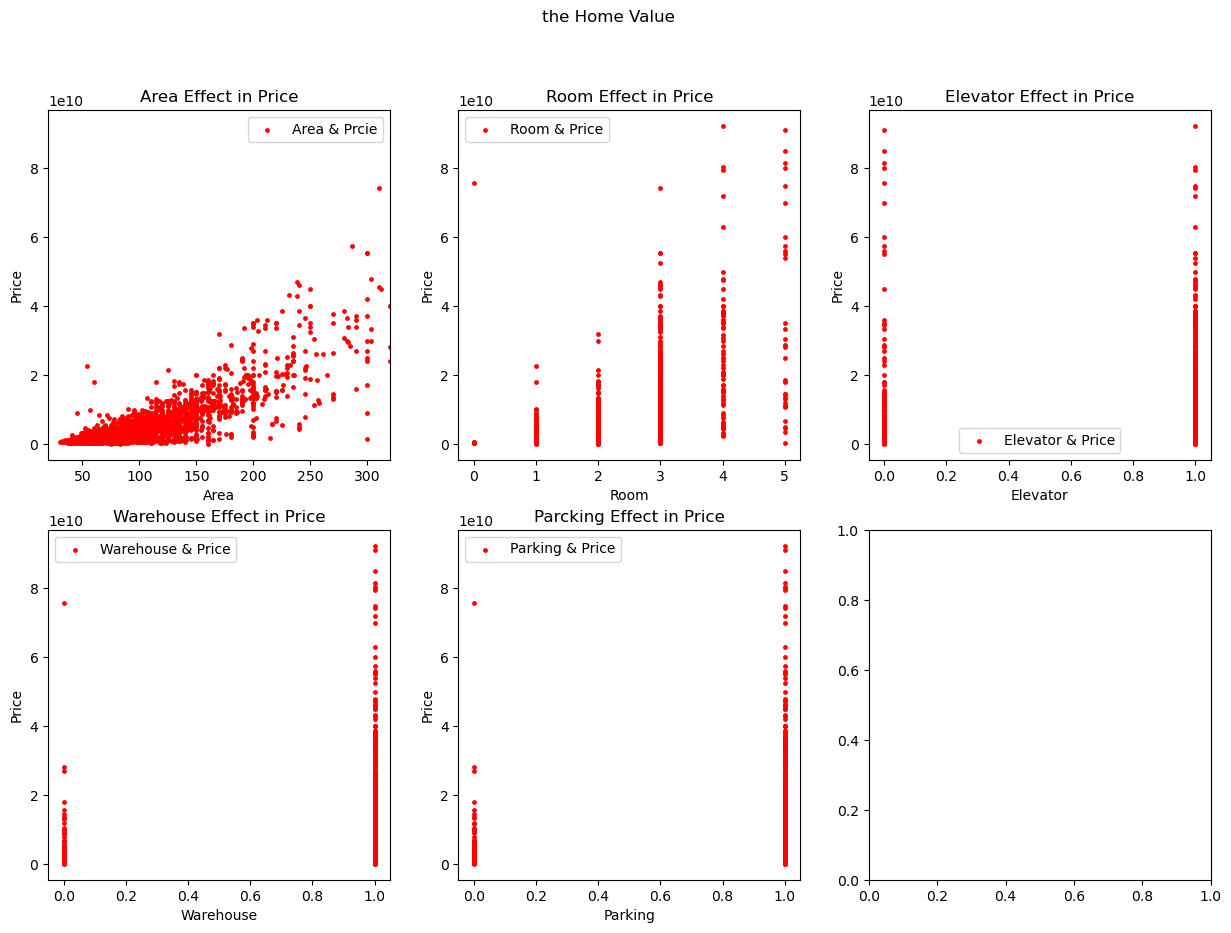

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, ((ax1, ax2, ax3),( ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# plot the features
ax1_plot = ax1.scatter(x = df["Area"], y = df['Price'], c= 'red', s=6, label='Area & Prcie') 
ax2_plot = ax2.scatter(x = df["Room"], y = df['Price'], c= 'red', s=6, label='Room & Price')
ax3_plot = ax3.scatter(x = df["Elevator"], y = df['Price'], c= 'red', s=6, label='Elevator & Price')
ax4_plot = ax4.scatter(x = df["Warehouse"], y = df['Price'], c= 'red', s=6, label='Warehouse & Price')
ax5_plot = ax5.scatter(x = df["Parking"], y = df['Price'], c= 'red', s=6, label='Parking & Price')

# customization
ax1.set(title='Area Effect in Price',xlabel='Area', ylabel='Price')
ax2.set(title='Room Effect in Price',xlabel='Room', ylabel='Price')
ax3.set(title='Elevator Effect in Price',xlabel='Elevator', ylabel='Price')
ax4.set(title='Warehouse Effect in Price',xlabel='Warehouse', ylabel='Price')
ax5.set(title='Parcking Effect in Price',xlabel='Parking', ylabel='Price')
fig.suptitle('the Home Value ')

#add legend
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

# set x-axis for the first subplot
ax1.set_xlim([20, 320])

c:\Users\Asus\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


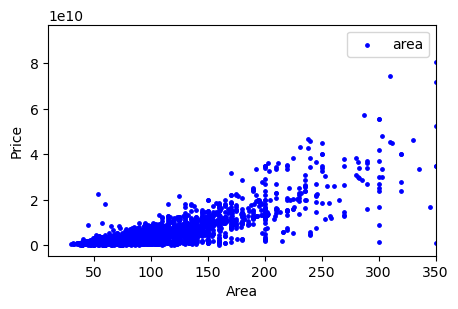

In [22]:
df2 = df[df['Area']<2000]

y_xp = np.exp(df2['Area'])

fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(df2['Area'], df2['Price'], c='blue', s=6, label= 'area')

#plot the exponential for 'Area
# ax.plot(df2['Area'], y_xp, label='exp(Area)')

# Customize plot
ax.set(xlabel='Area', ylabel='Price')
ax.set_xlim(10,350)
ax.legend()